
#  ANALISIS DE NORMALIDAD

Distribucion de probabilidad: Es un modelo teórico que describe la forma en que varían los resultados de un experimento aleatorio, da todas las probabilidades de todos los posibles resultados que podrían obtenerse cuando se realiza un experimento aleatorio. Se clasifican como discretas o continuas.

F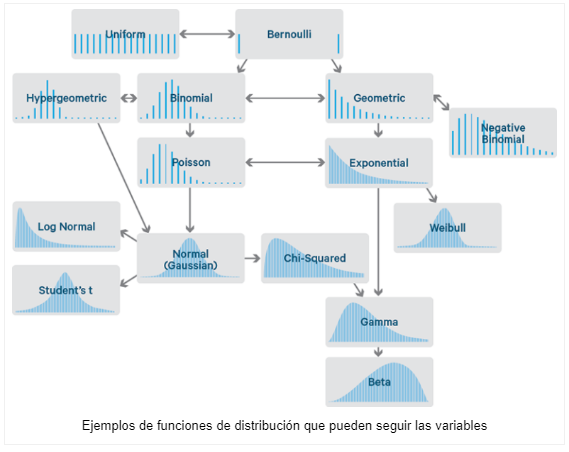

Fuente: https://machinelearningparatodos.com/como-saber-si-una-variable-sigue-una-distribucion-normal-en-python/

Las pruebas de normalidad permiten verificar si los datos reales siguen una distribución normal o no. Porque algunos algoritmos y metodos estadísticos (paramétricos) suponen que las variables de entrada siguen una distribución normal.

En estadística y probabilidad se llama distribución normal, distribución de Gauss, distribución gaussiana o distribución de Laplace-Gauss.La gráfica de su función de densidad tiene una forma acampanada y es simétrica respecto de un determinado parámetro estadístico.

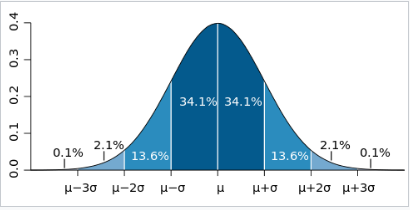



### La normalidad se puede determinar por:

a) representacion gráfica (histograma), grafico de cuantíles teóricos (Gráficos Q-Q), Box Plot o box and whisker plot

b) parámetros especificos (asimetria y curtosis) 

c) prueba de hipótesis (Shapiro-Wilk Test, D’Agostino’s K^2 Test, Anderson-Darling Test)

La prueba de normalidad y grafica de probabilidad (hist) suelen ser las mejores herramientas para evaluar la normalidad


In [ ]:
# importar librerias 
import pandas as pd


In [ ]:
# montar colab
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# asignar el archivo a un df
carprice = pd.read_csv("/content/gdrive/MyDrive/Estadistica/CarPrice_Assignment.csv")


In [ ]:
# ver las generalidades del df 
carprice.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# ver columnas
carprice.columns


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
#  estadística descriptiva del 'price'
carprice['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [ ]:
# mediana
carprice['price'].median()


10295.0

# a.1) representacion gráfica (histograma) 

Se representan los datos con un histograma y se comparan con una curva distribucion normal teorica

Esta representación está muy influenciada por el número de bins que se seleccionen y el ancho de cada uno.

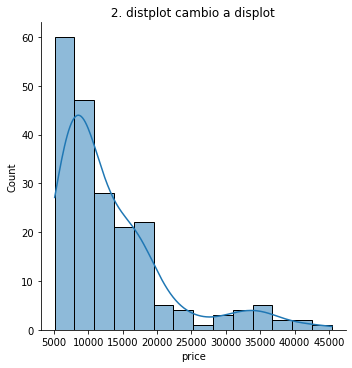

In [ ]:
# grafico de distribucion de 'price' 
import seaborn as sns
                                             
# distplot cambio a displot
sns.displot(carprice['price'], kde=True).set (title = ' 2. distplot cambio a displot ')


[Text(0.5, 1.0, ' 3. graficar con histograma y kde ')]

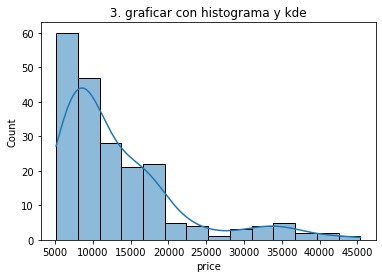

In [ ]:
# tambien se puede graficar con un histograma
sns.histplot(carprice['price'], kde="True").set (title = ' 3. graficar con histograma y kde ')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


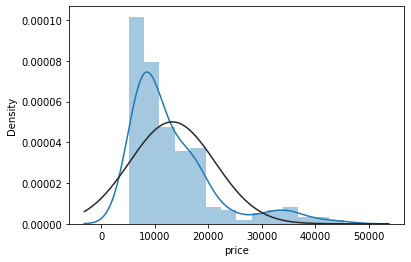

In [ ]:
# se compara la data con una curva nomal
from scipy.stats import norm
fig = sns.distplot(carprice['price'], fit = norm)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


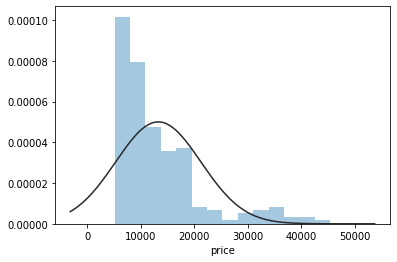

In [ ]:
# se elimina kde y se deja solo la normal
sns.distplot(carprice['price'], kde=False, fit=norm)


# a.2) grafico de cuantíles teóricos (Gráficos Q-Q)


No es una prueba estadística formal, ofrece una manera fácil de verificar visualmente si un conjunto de datos se distribuye normalmente o no.

Se grafican en un diagrama de dispersion, x = teorico, y = observado, se traza una línea para ver más clara esa diferencia.Las desviaciones de los puntos de la línea muestran una desviación de la distribución esperada. 

Si la distribución de la variable es la misma que la distribución de comparación se obtendrá, aproximadamente, una línea recta, especialmente cerca de su centro.

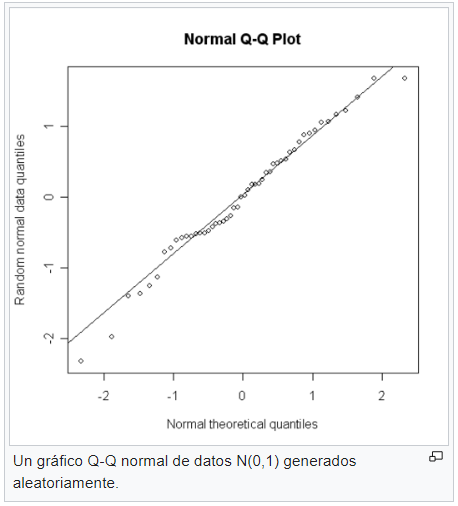

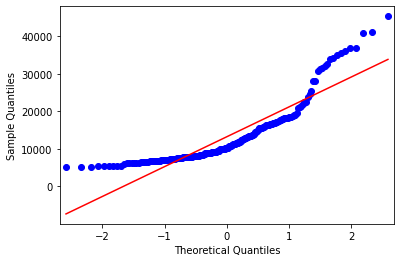

In [ ]:
# hacer grafico Q-Q 
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

qqplot(carprice['price'], line = 's')
plt.show ()

# a.3) Box Plot o box and whisker plot (diagrama de caja o diagrama de caja y bigotes)

Muestra la distribución de datos basada en un resumen de cinco números: minimo, primer cuartil (Q1), mediana (Q2), tercer cuartil (Q3) y máximo

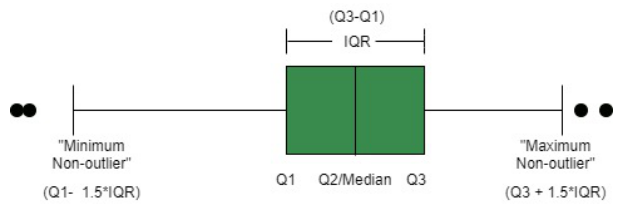

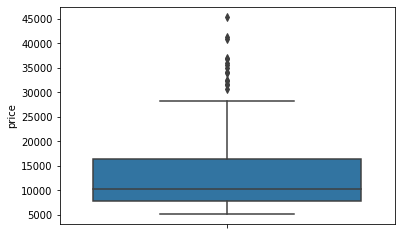

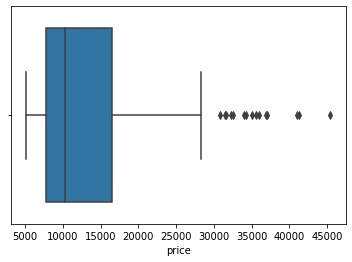

In [ ]:
# Box Plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y=carprice['price'])
plt.show() 


# b) parámetros especificos (asimetria y curtosis-apuntamiento)

Describen la forma de la distribucion = si los datos estan repartidos de forma simetrica

Un valor de curtosis y/o coeficiente de asimetría

entre -1 y 1, es generalmente considerada una ligera desviación de la normalidad (Bulmer, 1979), (Brown, n.d.)

entre -2 y 2 hay una evidente desviación de la normal pero no extrema.

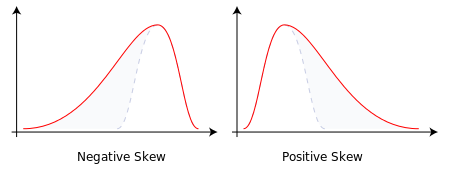

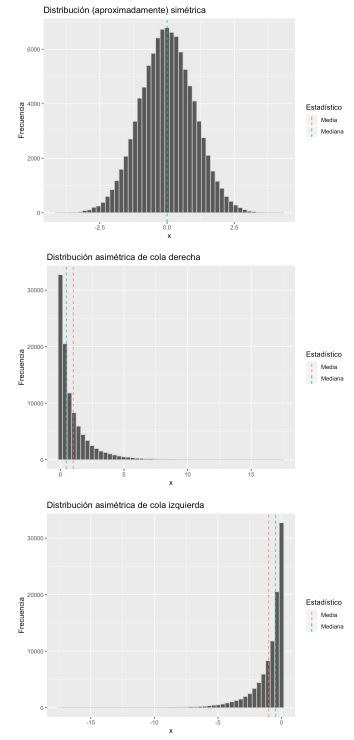

In [ ]:
# asimetria estadistcia (sesgo-skewness)
import scipy.stats as sp 
asimetria = sp.skew(carprice['price'], bias = False) 
print (asimetria)


1.777678156091445


media = 13276.710570731706
mediana = 10295.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


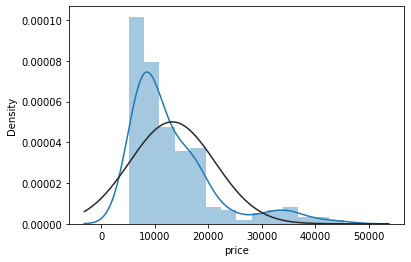

In [ ]:
#comparar la asimetria con otras metricas y graficas 
print ('media =' , carprice['price'].mean())
#print (media)
print ('mediana =' , carprice['price'].median())
#print (mediana)

# fit = norm (curva negra)
from scipy.stats import norm
import seaborn as sns
sns.distplot(carprice['price'], fit = norm)


**ANALISIS**

asimetria = 1.777678156091445

media = 13,276.710570731706 > mediana = 10,295.0


asimetria > 0 = asimetría positiva = Distribución asimétrica a la cola derecha = MEDIA > MEDIANA = la cola derecha es más larga que la izquierda = encontramos valores más alejados de la media = los datos se ponderan más en el lado izquierdo de la distribución.

# b.2 curtosis o apuntamiento (concentracion) - forma de la distribucion

De una variable estadística/aleatoria es una característica de forma de su distribución de frecuencias/probabilidad con respecto a una distribucion normal = concentración de los datos a la media

mayor grado de concentración (menor dispersión) = apuntada

menor grado de concentración (mayor dispersión) = achatada

Tipos de curtoris

1. Leptocúrtica: gran concentración de los valores en torno a su media (g2>3) = contiene valores que exceden las 3 desviaciones típicas de la media

2. Mesocúrtica: concentración normal de los valores en torno a su media (g2=3).

3. Platicúrtica: baja concentración de los valores en torno a su media (g2<3).


In [ ]:
# curtosis - concentracion
import scipy.stats as sp 
sp.kurtosis(carprice['price'], bias = False)  


3.0516478713963995

# c) prueba de hipótesis (Shapiro-Wilk Test, D’Agostino’s K^2 Test, Anderson-Darling Test)

Shapiro-Wilk test y D'Agostino's K-squared test son los mas utilizados para analisis de normalidad

# c.1) Shapiro-Wilk test

Se considera uno de las pruebas más potentes para el contraste de normalidad. Plantea la hipótesis nula que la muestra proviene de una distribución normal

H0: La distribución es normal

H1: La distribución no es normal

nivel de significancia (alfa) α = 0.05

p-value(p calculado): se utiliza para rechazar o retener la H0 (se obtiene con los datos de la muestra, lo da la prueba aplicada)

**Decision**: 

p-value <= α  = suficiente evidencia para rechazar H0 = no hay normalidad = la variable no tiene una distribucion es normal

p-value > α  = no se puede rechazar la H0 = hay normalidad = la distribución de la variable es normal

In [ ]:
# utilizar una funcion para comparar p-value con α (nivel de significancia, alafa) 
# p <= α = rechazar H0  , p > α = NO rechazar H0 
def check_p_val(p_value, alpha):

    if p_value <= alpha:
        print('Se tiene evidencia para rechazar la H0 = los datos-la VAR NO tiene una distribucion normal')
    else:
        print('NO se tiene evidencia para rechazar la H0 = los datos-la VAR tiene una distribucion normal')


In [ ]:
# Shapiro-Wilk test
from scipy import stats

stats.shapiro(carprice['price'])

# shapiro_test.statistic = 0.8006654381752014
# shapiro_test.pvalue = 1.8491777441833604e-15

ShapiroResult(statistic=0.8006654381752014, pvalue=1.8491777441833604e-15)

In [ ]:
# comparar pvlue y α

check_p_val(1.8491777441833604e-15 , 0.05)

Se tiene evidencia para rechazar la H0 = los datos-la VAR NO tiene una distribucion normal


**ANALISIS**: p < α  

1.8491777441833604e-15 < 0.05 = hay suficiente evidencia para rechazar H0 = no hay normalidad = la muestra no proviene de una poblacion con distribucion normal

# c.2) D'Agostino's K-squared test

In [ ]:
# D'Agostino's K-squared test
from scipy import stats

stats.normaltest(carprice['price'])


NormaltestResult(statistic=77.37514013383584, pvalue=1.578344501676757e-17)

In [ ]:
# comparar pvlue y α
check_p_val(1.578344501676757e-17 , 0.05)

Se tiene evidencia para rechazar la H0 = los datos-la VAR NO tiene una distribucion normal


**ANALISIS**: p < α  

1.578344501676757e-17 < 0.05 = hay suficiente evidencia para rechazar H0 = no hay normalidad = la muestra no proviene de una poblacion con distribucion normal

# c.3) Anderson-Darling Test (no parametrica, solo distribuciones continuas) 

se usa con mayor frecuencia en contextos donde se está probando una familia de distribuciones

si la desviación de la normalidad en las colas es el problema principal (distribuciones con colas pronunciadas) = más efectiva para detectar desviaciones en las colas de la distribución


Mientras mejor se ajuste la distribución a los datos, menor será este estadístico

Las hipótesis para la prueba de Anderson-Darling son:

H0: Los datos siguen una distribución especificada (normal)

H1: Los datos no siguen una distribución especificada

estadística de prueba > valor crítico = rechace H0 = los datos NO provienen de la distribución elegida (normal)


In [ ]:
# Anderson-Darling Test
from scipy import stats
norm = stats.anderson(carprice['price'], dist='norm')               
print ('normal =' , norm)

expon = stats.anderson(carprice['price'], dist='expon')               
print ('exponencial =' , expon)

logistic = stats.anderson(carprice['price'], dist='expon')                 
print ('logistic =' , logistic)


normal = AndersonResult(statistic=12.340562863167577, critical_values=array([0.565, 0.644, 0.772, 0.901, 1.072]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
exponencial = AndersonResult(statistic=25.094253894566123, critical_values=array([0.919, 1.075, 1.337, 1.601, 1.951]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
logistic = AndersonResult(statistic=25.094253894566123, critical_values=array([0.919, 1.075, 1.337, 1.601, 1.951]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [ ]:
def estadístico_de_prueba(estadístico_de_prueba, valor_critico):

    if estadístico_de_prueba <= valor_critico:
        print('No se tiene evidencia para rechazar la H0 = los datos-la VAR tiene una distribucion normal')
    else:
        print('Se tiene evidencia para rechazar la H0 = los datos-la VAR NO tiene una distribucion normal')


In [ ]:
# resultados de las 3 pruebas 

norm = estadístico_de_prueba(12.34, 0.772)
expon = estadístico_de_prueba(25.09, 1.337)
logistic = estadístico_de_prueba(25.09, 1.337)

Se tiene evidencia para rechazar la H0 = los datos-la VAR NO tiene una distribucion normal
Se tiene evidencia para rechazar la H0 = los datos-la VAR NO tiene una distribucion normal
Se tiene evidencia para rechazar la H0 = los datos-la VAR NO tiene una distribucion normal


ANALISIS: 

α = 0.05

statistic (estadístico de la prueba) = 12.34

critical_values = valor critico (cada uno corresponde a un nivel de significancia=[0.565, 0.644, 0.772, 0.901, 1.072]

significance_level α (varios niveles de signficancia van del 15% al 1%)=[15. , 10. ,  5. ,  2.5,  1. ]

-Si se quiere probar la H0 a un nivel de significancia α = 5% 

valor critico = 0.772

estadístico de la prueba = 12.34

estadístico de la prueba 0.37 <= valor critico 0.737 = NO rechazar H0 = los datos siguen una distribución especificada (normal)

**12.34 > 0.772** = los datos no siguen una distribución normal